### Baklazhenko Danila J4132. Practice work №4 - Algorithms for unconstrained nonlinear optimization. Stochastic and metaheuristic algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math
import random
import numdifftools as num
from geopy import distance
from scipy import optimize
from matplotlib.animation import FuncAnimation

import geopandas as gpd
from shapely.geometry import Point, LineString

#### Generate noisy data

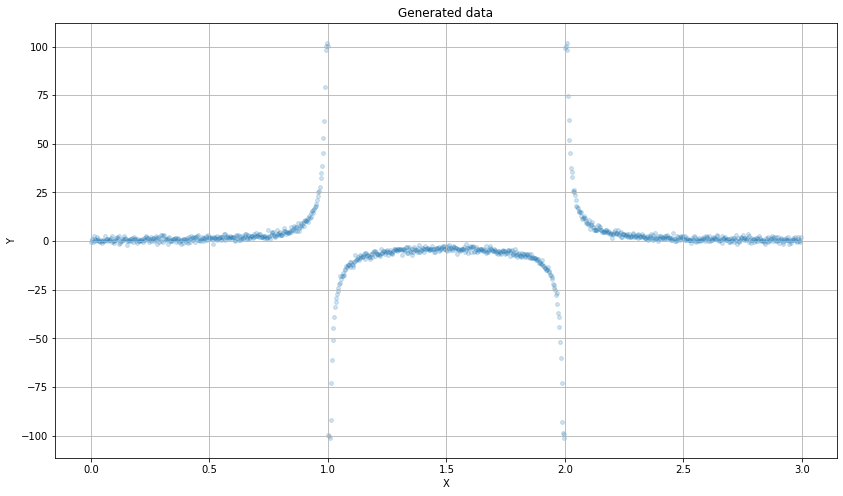

In [46]:

def Fx(x):
    return ( 1 / (x**2 - 3*x + 2) )

rang = range(0, 1000)
x_data = [None] * len(rang)
y_data = [None] * len(rang)
eps = 0.001

random.seed()

for k in rang:
    Xk = 3 * k / 1000
    fx = Fx(Xk)
    DeltaK = random.normalvariate(0, 1)
    
    if fx < -100:
        y_data[k] = -100 + DeltaK
    elif fx > 100:
        y_data[k] = 100 + DeltaK
    else:
        y_data[k] = fx + DeltaK
        
    x_data[k] = Xk
    
x_data = np.array(x_data)
y_data = np.array(y_data)

# Plot noisy data
plt.scatter(x_data, y_data, s = 15, alpha = 0.2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated data')
plt.grid()
plt.show()

#### Define error function

In [47]:
def approx_f(x, a, b, c, d):
    return (a * x + b) / (x**2 + c*x + d)

def func_rat_lstqr(prms):
    a = prms[0]
    b = prms[1]
    c = prms[2]
    d = prms[3]
    return(sum(( (a*x_data + b) / (x_data**2 + c*x_data + d) - y_data) ** 2) )

# For Levenberg-Marquardt algorithm
def func_rat_forLM(prms, x, y):
    a = prms[0]
    b = prms[1]
    c = prms[2]
    d = prms[3]
    return( (a*x + b) / (x**2 + c*x + d) - y )

#### Find optimum with Neldear-Mead method

In [48]:
# Optimization with Neldear-Mead method
x_init = np.array([1, -1, -1, 1])
res_NM = optimize.minimize(func_rat_lstqr, x_init, method='nelder-mead', options={'disp': True, 'fatol': 0.01})
a_opt_NM = res_NM.x[0]
b_opt_NM = res_NM.x[1]
c_opt_NM = res_NM.x[2]
d_opt_NM = res_NM.x[3]
print(f'The optimal value of the coefficient a = {a_opt_NM}, b = {b_opt_NM}, c = {c_opt_NM}, d = {d_opt_NM}')
print(res_NM)

Optimization terminated successfully.
         Current function value: 256789.916343
         Iterations: 341
         Function evaluations: 569
The optimal value of the coefficient a = -0.19946808576853137, b = 0.38769028402908556, c = -3.959138374607029, d = 3.9187986108486914
 final_simplex: (array([[-0.19946809,  0.38769028, -3.95913837,  3.91879861],
       [-0.19949756,  0.38776704, -3.95917727,  3.9188752 ],
       [-0.19946234,  0.38767552, -3.95913081,  3.9187837 ],
       [-0.19947247,  0.38771298, -3.95914601,  3.91881349],
       [-0.19949367,  0.3877546 , -3.95917167,  3.9188643 ]]), array([256789.91634337, 256789.91968262, 256789.92023333, 256789.92289014,
       256789.92296739]))
           fun: 256789.91634337066
       message: 'Optimization terminated successfully.'
          nfev: 569
           nit: 341
        status: 0
       success: True
             x: array([-0.19946809,  0.38769028, -3.95913837,  3.91879861])


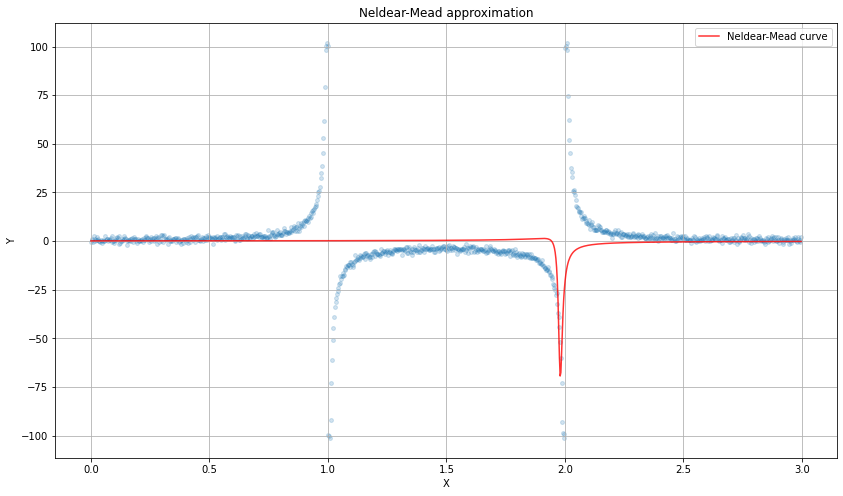

In [49]:
# Plot obtained value
NM_approx = (a_opt_NM*x_data + b_opt_NM)/(x_data**2 + c_opt_NM*x_data + d_opt_NM) 

plt.plot(x_data, NM_approx, color = 'red', linewidth = 1.5, label = 'Neldear-Mead curve', alpha = 0.8)
plt.scatter(x_data, y_data, s = 15, alpha = 0.2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Neldear-Mead approximation')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#### Find optimum with Levenberg-Marquardt algorithm

In [50]:
# Optimization with Levenberg-Marquardt method
x_init = np.array([1, -1, -1, 1])
res_LM = optimize.least_squares(func_rat_forLM, x_init, args = (x_data, y_data), method = 'lm')
a_opt_LM = res_LM.x[0]
b_opt_LM = res_LM.x[1]
c_opt_LM = res_LM.x[2]
d_opt_LM = res_LM.x[3]
print(f'The optimal value of the coefficient a = {a_opt_LM}, b = {b_opt_LM}, c = {c_opt_LM}, d = {d_opt_LM}')
#print(res_LM)

The optimal value of the coefficient a = -1.015646809368865, b = 1.0161394133891375, c = -2.0008610992397373, d = 1.0008775496214801


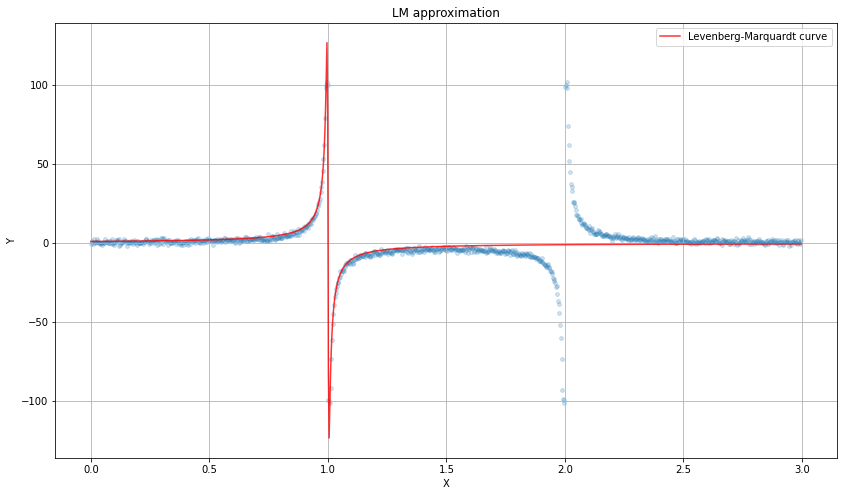

In [51]:
# Plot obtained results
LM_approx = (a_opt_LM*x_data + b_opt_LM)/(x_data**2 + c_opt_LM*x_data + d_opt_LM) 

plt.plot(x_data, LM_approx, color = 'red', linewidth = 1.5, label = 'Levenberg-Marquardt curve', alpha = 0.8)
plt.scatter(x_data, y_data, s = 15, alpha = 0.2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('LM approximation')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#### Simulated annealing method

In [52]:
bounds = [(-10, 10), (-10, 10), (-10, 10), (-10, 10)]
res_anneal = optimize.dual_annealing(func_rat_lstqr, bounds = bounds, maxiter = 1000)

print(res_anneal)
a_opt_anneal = res_anneal.x[0]
b_opt_anneal = res_anneal.x[1]
c_opt_anneal = res_anneal.x[2]
d_opt_anneal = res_anneal.x[3]
print(f'The optimal value of the coefficient a = {a_opt_anneal}, b = {b_opt_anneal}, c = {c_opt_anneal}, d = {d_opt_anneal}')

     fun: 136421.14829936842
 message: ['Maximum number of iteration reached']
    nfev: 8991
    nhev: 0
     nit: 1000
    njev: 198
  status: 0
 success: True
       x: array([-1.0115061 ,  1.01200914, -2.00091263,  1.00092895])
The optimal value of the coefficient a = -1.0115060955192678, b = 1.0120091409200445, c = -2.000912633310731, d = 1.000928954896065


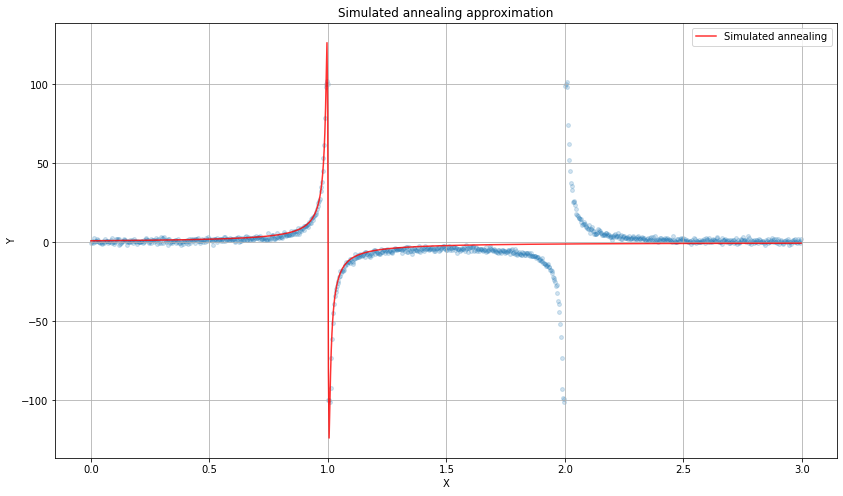

In [53]:
# Plot obtained results
anneal_approx = (a_opt_anneal*x_data + b_opt_anneal)/(x_data**2 + c_opt_anneal*x_data + d_opt_anneal) 

plt.plot(x_data, anneal_approx, color = 'red', linewidth = 1.5, label = 'Simulated annealing', alpha = 0.8)
plt.scatter(x_data, y_data, s = 15, alpha = 0.2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simulated annealing approximation')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#### Differential evolution method

In [54]:
bounds = [(-10, 10), (-10, 10), (-10, 10), (-10, 10)]
res_evol = optimize.differential_evolution(func_rat_lstqr, bounds = bounds, maxiter = 1000)

print(res_evol)
a_opt_evol = res_evol.x[0]
b_opt_evol = res_evol.x[1]
c_opt_evol = res_evol.x[2]
d_opt_evol = res_evol.x[3]
print(f'The optimal value of the coefficient a = {a_opt_evol}, b = {b_opt_evol}, c = {c_opt_evol}, d = {d_opt_evol}')

     fun: 136421.1483637381
     jac: array([2.27009879e-01, 1.77533367e-01, 2.01354852e+02, 2.00950309e+02])
 message: 'Optimization terminated successfully.'
    nfev: 1205
     nit: 6
 success: True
       x: array([-1.01149897,  1.012002  , -2.00091255,  1.00092887])
The optimal value of the coefficient a = -1.011498973398526, b = 1.0120019997472458, c = -2.0009125458717105, d = 1.0009288672775856


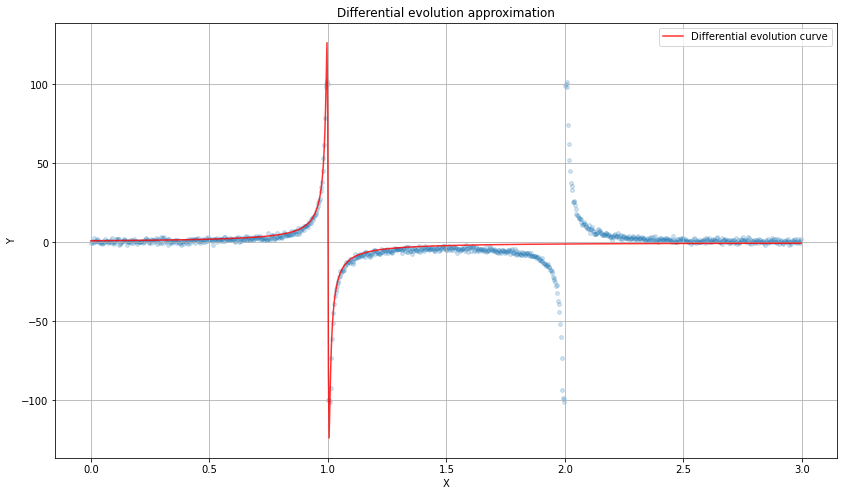

In [55]:
# Plot obtained results
evol_approx = (a_opt_evol*x_data + b_opt_evol)/(x_data**2 + c_opt_evol*x_data + d_opt_evol) 

plt.plot(x_data, evol_approx, color = 'red', linewidth = 1.5, label = 'Differential evolution curve', alpha = 0.8)
plt.scatter(x_data, y_data, s = 15, alpha = 0.2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Differential evolution approximation')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#### Results comparsion

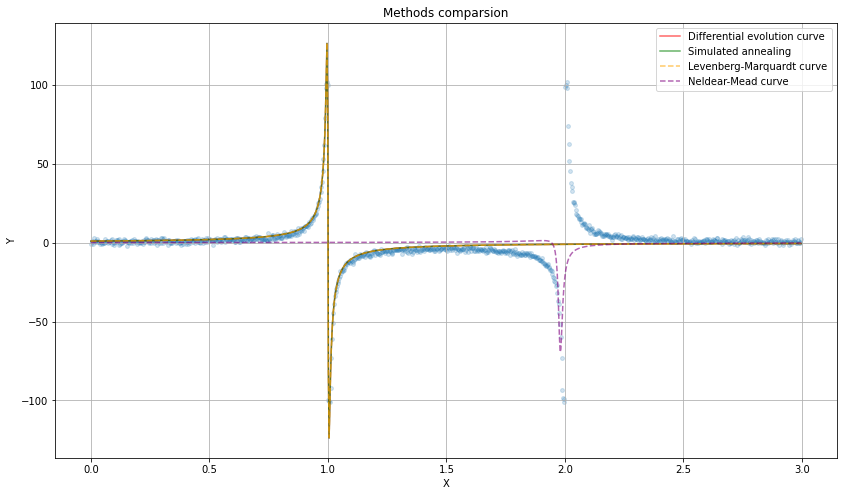

In [56]:
plt.rcParams['figure.figsize'] = [14, 8]

plt.plot(x_data, evol_approx, color = 'red',  linewidth = 1.5, label = 'Differential evolution curve', alpha = 0.6)
plt.plot(x_data, anneal_approx, color = 'green', linewidth = 1.5, label = 'Simulated annealing', alpha = 0.6)
plt.plot(x_data, LM_approx, color = 'orange', linestyle = '--', linewidth = 1.5, label = 'Levenberg-Marquardt curve', alpha = 0.6)
plt.plot(x_data, NM_approx, color = 'purple', linestyle = '--', linewidth = 1.5, label = 'Neldear-Mead curve', alpha = 0.6)

plt.scatter(x_data, y_data, s = 15, alpha = 0.2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Methods comparsion')
plt.legend(loc = 'best')
plt.grid()
plt.show()

### Part 2 - Commivoyager problem with simulated annealing

In [13]:
# Dataset contain distance between all world city capatals, we will solve commivoyager problem for several capital cities
# City coordinates
city_loc_dat = pd.read_csv('worldcities.csv') 

# Get top N Russian cities
city_df = city_loc_dat[city_loc_dat['iso2'] == 'RU'].head(50)
city_df.head(15)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
14,Moscow,Moscow,55.7558,37.6178,Russia,RU,RUS,Moskva,primary,17125000.0,1643318494
131,Saint Petersburg,Saint Petersburg,59.9500,30.3167,Russia,RU,RUS,Sankt-Peterburg,admin,5351935.0,1643616350
466,Novosibirsk,Novosibirsk,55.0333,82.9167,Russia,RU,RUS,Novosibirskaya Oblast’,admin,1602915.0,1643399240
505,Yekaterinburg,Yekaterinburg,56.8356,60.6128,Russia,RU,RUS,Sverdlovskaya Oblast’,admin,1468833.0,1643582706
570,Nizhniy Novgorod,Nizhniy Novgorod,56.3269,44.0075,Russia,RU,RUS,Nizhegorodskaya Oblast’,admin,1264075.0,1643012126
577,Kazan,Kazan,55.7908,49.1144,Russia,RU,RUS,Tatarstan,admin,1243500.0,1643101260
593,Chelyabinsk,Chelyabinsk,55.1500,61.4000,Russia,RU,RUS,Chelyabinskaya Oblast’,admin,1202371.0,1643224011
608,Omsk,Omsk,54.9667,73.3833,Russia,RU,RUS,Omskaya Oblast’,admin,1178391.0,1643360863
611,Samara,Samara,53.1833,50.1167,Russia,RU,RUS,Samarskaya Oblast’,admin,1169719.0,1643205757
635,Rostov,Rostov,47.2333,39.7167,Russia,RU,RUS,Rostovskaya Oblast’,admin,1125299.0,1643013518


In [14]:
# Calculate distance matrix

dist_matrix = pd.DataFrame(columns = ['Source', 'Source_lat', 'Source_lon', 'Dest', 'Dest_lat', 'Dest_lon', 'Distance'])

for i in range(len(city_df)):
    for j in range(len(city_df)):
        if i != j:
            #print(city_df['city'].iloc[i])
            #print(city_df['city'].iloc[j])
            p1 = (city_df['lat'].iloc[i], city_df['lng'].iloc[i])
            p2 = (city_df['lat'].iloc[j], city_df['lng'].iloc[j])
            dist_matrix.loc[len(dist_matrix)] = [ city_df['city'].iloc[i], city_df['lat'].iloc[i],  city_df['lng'].iloc[i],\
                                                  city_df['city'].iloc[j], city_df['lat'].iloc[j],  city_df['lng'].iloc[j],\
                                                  distance.distance(p1, p2, ellipsoid = 'WGS-84').km ]
            
#dist_matrix

In [15]:

city_df["Coordinates"] = list(zip(city_df.lng, city_df.lat))

city_df["Coordinates"] = city_df["Coordinates"].apply(Point)

gdf = gpd.GeoDataFrame(city_df, geometry="Coordinates")

#### Plot of all cities

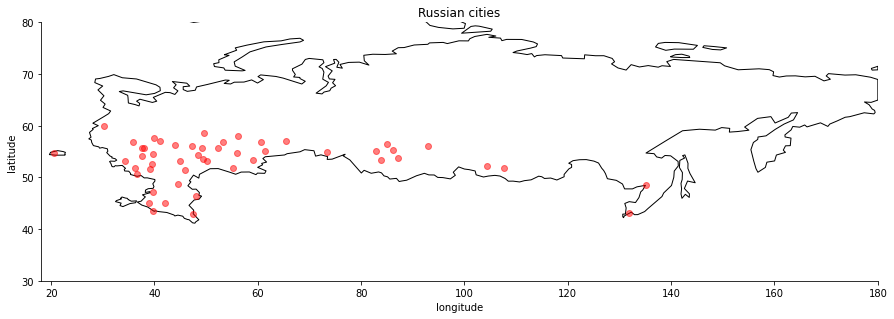

In [16]:
# Grab low resolution world file
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

fig, gax = plt.subplots(figsize=(15,15))

# Reduce map to only russia
world.query("name == 'Russia'").plot(ax = gax, edgecolor='black', color='white')

#Plot cities
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_xlim([18, 180])
gax.set_ylim([30,80])
gax.set_title('Russian cities')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# Label the cities
#for x, y, label in zip(gdf['Coordinates'].x, gdf['Coordinates'].y, gdf['city']):
    #gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

plt.show()

In [17]:
# Make lines for distance matrix

dist_matrix["Coordinates_src"] = list(zip(dist_matrix.Source_lon, dist_matrix.Source_lat))
dist_matrix["Coordinates_dest"] = list(zip(dist_matrix.Dest_lon, dist_matrix.Dest_lat))

dist_matrix["Coordinates_src"] = dist_matrix["Coordinates_src"].apply(Point)
dist_matrix["Coordinates_dest"] = dist_matrix["Coordinates_dest"].apply(Point)

Lines = []
for i in range(len(dist_matrix)):
    Lines.append( LineString([[dist_matrix["Coordinates_src"].iloc[i].x, dist_matrix["Coordinates_src"].iloc[i].y],\
                             [dist_matrix["Coordinates_dest"].iloc[i].x, dist_matrix["Coordinates_dest"].iloc[i].y]]) )
    
dist_matrix["Lines"] = Lines
dist_matrix.head(8)

C:\Users\danil\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,Source,Source_lat,Source_lon,Dest,Dest_lat,Dest_lon,Distance,Coordinates_src,Coordinates_dest,Lines
0,Moscow,55.7558,37.6178,Saint Petersburg,59.9500,30.3167,636.576818,POINT (37.6178 55.7558),POINT (30.3167 59.95),"LINESTRING (37.6178 55.7558, 30.3167 59.95)"
1,Moscow,55.7558,37.6178,Novosibirsk,55.0333,82.9167,2819.964296,POINT (37.6178 55.7558),POINT (82.91670000000001 55.0333),"LINESTRING (37.6178 55.7558, 82.91670000000001..."
2,Moscow,55.7558,37.6178,Yekaterinburg,56.8356,60.6128,1422.040039,POINT (37.6178 55.7558),POINT (60.6128 56.8356),"LINESTRING (37.6178 55.7558, 60.6128 56.8356)"
3,Moscow,55.7558,37.6178,Nizhniy Novgorod,56.3269,44.0075,403.137238,POINT (37.6178 55.7558),POINT (44.0075 56.3269),"LINESTRING (37.6178 55.7558, 44.0075 56.3269)"
4,Moscow,55.7558,37.6178,Kazan,55.7908,49.1144,720.680138,POINT (37.6178 55.7558),POINT (49.1144 55.7908),"LINESTRING (37.6178 55.7558, 49.1144 55.7908)"
5,Moscow,55.7558,37.6178,Chelyabinsk,55.1500,61.4000,1498.839029,POINT (37.6178 55.7558),POINT (61.4 55.15),"LINESTRING (37.6178 55.7558, 61.4 55.15)"
6,Moscow,55.7558,37.6178,Omsk,54.9667,73.3833,2244.602891,POINT (37.6178 55.7558),POINT (73.38330000000001 54.9667),"LINESTRING (37.6178 55.7558, 73.38330000000001..."
7,Moscow,55.7558,37.6178,Samara,53.1833,50.1167,858.032058,POINT (37.6178 55.7558),POINT (50.1167 53.1833),"LINESTRING (37.6178 55.7558, 50.1167 53.1833)"


#### Plot of all possible roads

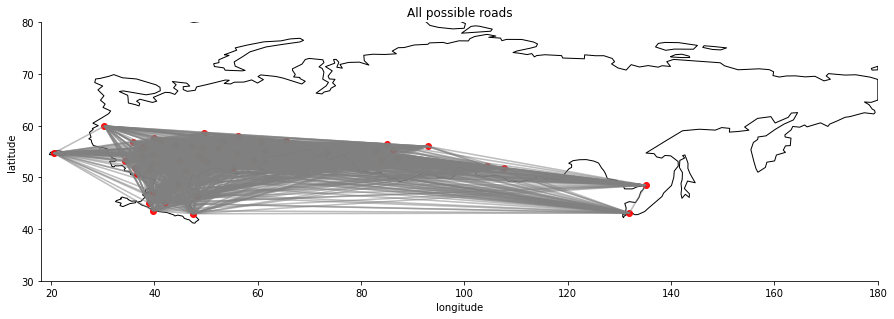

In [18]:
gdf_lines = gpd.GeoDataFrame(dist_matrix, geometry="Lines")

# Grab low resolution world file
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

fig, gax = plt.subplots(figsize=(15,15))

# Reduce map to only russia
world.query("name == 'Russia'").plot(ax = gax, edgecolor='black', color='white')

#Plot cities lines
gdf_lines.plot(ax=gax, color='gray', alpha = 0.3)
gdf.plot(ax=gax, color='red', alpha = 0.9)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_xlim([18, 180])
gax.set_ylim([30,80])
gax.set_title('All possible roads')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# Label the cities
#for x, y, label in zip(gdf['Coordinates'].x, gdf['Coordinates'].y, gdf['city']):
    #gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

plt.show()

In [19]:
path = []

# Initialize random path
def rand_initialize():
    for i in range( len(city_df)):
        next_node = random.randint(0, len(city_df) - 1)
        while next_node in path:
            next_node = random.randint(0, len(city_df) - 1)
        path.append(next_node)
    
def plot_path(pl_path):

    plot_lines = pd.DataFrame()

    for i in range(len(pl_path)):
        if i == len(pl_path) - 1:
            plot_lines = plot_lines.append(dist_matrix[ (dist_matrix["Source"]  == city_df.iloc[pl_path[i], 0]) \
                                          & (dist_matrix["Dest"] == city_df.iloc[pl_path[0], 0] )  ])
        else:
            plot_lines = plot_lines.append(dist_matrix[ (dist_matrix["Source"] == city_df.iloc[pl_path[i], 0] ) \
                                                & (dist_matrix["Dest"] == city_df.iloc[pl_path[i+1], 0] ) ])

    gdf_lines = gpd.GeoDataFrame(plot_lines, geometry="Lines")

    fig, gax = plt.subplots(figsize=(15,15))

    # Reduce map to only russia
    world.query("name == 'Russia'").plot(ax = gax, edgecolor='black', color='white')

    #Plot cities lines
    gdf_lines.plot(ax=gax, color='gray', alpha = 0.5)
    gdf.plot(ax=gax, color='red', alpha = 0.5)

    gax.set_xlabel('longitude')
    gax.set_ylabel('latitude')
    gax.set_xlim([18, 180])
    gax.set_ylim([30,80])
    gax.set_title('Russian cities')

    gax.spines['top'].set_visible(False)
    gax.spines['right'].set_visible(False)

    # Label the cities
    #for x, y, label in zip(gdf['Coordinates'].x, gdf['Coordinates'].y, gdf['city']):
        #gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

    plt.show()   
    
    return gax, fig
    
def calculate_path(pl_path):
    res = 0
    for i in range(len(pl_path)):
        if i == len(pl_path) - 1:
            res += float(dist_matrix[ (dist_matrix["Source"]  == city_df.iloc[pl_path[i], 0]) \
                                & (dist_matrix["Dest"] == city_df.iloc[pl_path[0], 0] )  ].Distance )
        else:
            res += float(dist_matrix[ (dist_matrix["Source"] == city_df.iloc[pl_path[i], 0] ) \
                                            & (dist_matrix["Dest"] == city_df.iloc[pl_path[i+1], 0] ) ].Distance) 

    return res
    
rand_initialize()
#print(path)    


### Print first-step random generated path

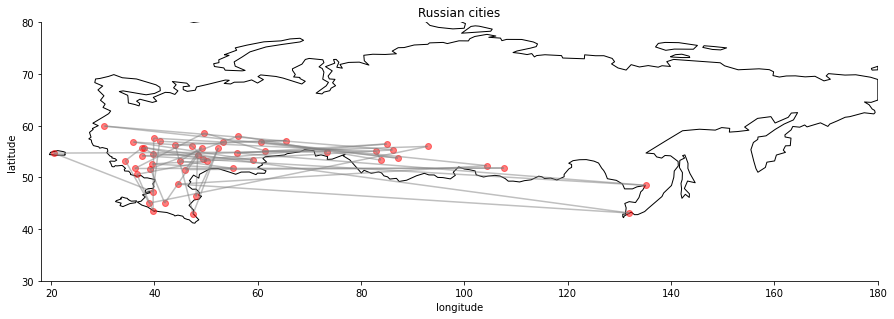

(<AxesSubplot:title={'center':'Russian cities'}, xlabel='longitude', ylabel='latitude'>,
 <Figure size 1080x1080 with 1 Axes>)

In [20]:
plot_path(path)

In [21]:
# Initial path lenght
calculate_path(path)

99424.04927620654

### Simulated annealing

In [22]:
#Reverse path function
def reverse_path(pl_path, cand1, cand2):
    if cand1 > cand2:
        cand1, cand2 = cand2, cand1
    candidate_path = list(pl_path[0:cand1] + pl_path[cand1:cand2+1][::-1] + pl_path[cand2+1:len(path)])
    return candidate_path

# Transport path function
def transport_path(pl_path, cand1, cand2):
    if cand1 > cand2:
        cand1, cand2 = cand2, cand1
        
    segment = path[cand1:cand2+1]
    remainder_path = path[0:cand1] + path[cand2+1:len(path)]
    
    placer =  random.randint(0, len(remainder_path) )
    
    candidate_path = list(remainder_path[0:placer] + segment + remainder_path[placer:len(remainder_path)])
    return candidate_path

In [38]:
all_paths = []


# Simulated annealing function
def sim_anneal(path, Temperature, alpha, max_iter):
    
    iterations = 0
    iter_with_improve = 0
    no_improve = 0

    while (iterations < max_iter) & (no_improve == 0):

        iter_with_improve = 0
        i = 0
        no_improve = 1

        while (i < 1000) & (iter_with_improve < 10):
            # Choose random candidates
            candidate_1 = candidate_2 = random.randint(0, len(city_df) - 1)
            while candidate_2 == candidate_1:
                candidate_2 = random.randint(0, len(city_df) - 1)

            #"Flip" a coin
            coin = random.random()
            if coin > 0.5:
                candidate_path = reverse_path(path, candidate_1, candidate_2 ) 
            else:
                candidate_path = transport_path(path, candidate_1, candidate_2 )

            cost_diff = calculate_path(candidate_path) - calculate_path(path) 

            # Decide if switch path or not
            if cost_diff < 0:
                all_paths.append(path)
                path = candidate_path
                iter_with_improve += 1
                no_improve = 0
            else:
                if math.exp(-abs(cost_diff) / Temperature) > random.random():
                    all_paths.append(path)
                    path = candidate_path
                    iter_with_improve += 1
                    no_improve = 0
            i += 1
            
        #all_paths.append(path)
        Temperature *= alpha
        iterations += 1

    return(path)

get_path = sim_anneal(path, 1000, 0.9, 1000)

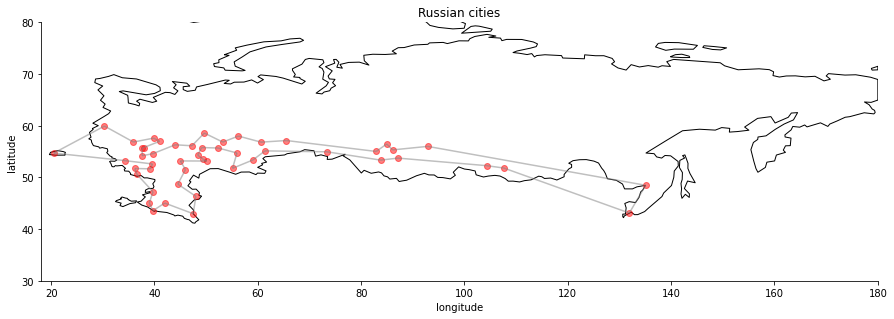

(<AxesSubplot:title={'center':'Russian cities'}, xlabel='longitude', ylabel='latitude'>,
 <Figure size 1080x1080 with 1 Axes>)

In [39]:
plot_path(get_path)

#### Make GIF of all temperature iterations

In [40]:
def plot_path_gif(pl_path):

    plot_lines = pd.DataFrame()

    for i in range(len(pl_path)):
        if i == len(pl_path) - 1:
            plot_lines = plot_lines.append(dist_matrix[ (dist_matrix["Source"]  == city_df.iloc[pl_path[i], 0]) \
                                          & (dist_matrix["Dest"] == city_df.iloc[pl_path[0], 0] )  ])
        else:
            plot_lines = plot_lines.append(dist_matrix[ (dist_matrix["Source"] == city_df.iloc[pl_path[i], 0] ) \
                                                & (dist_matrix["Dest"] == city_df.iloc[pl_path[i+1], 0] ) ])

    gdf_lines = gpd.GeoDataFrame(plot_lines, geometry="Lines")

    fig, gax = plt.subplots(figsize=(15,15))

    # Reduce map to only russia
    world.query("name == 'Russia'").plot(ax = gax, edgecolor='black', color='white')

    #Plot cities lines
    gdf_lines.plot(ax=gax, color='gray', alpha = 0.5)
    gdf.plot(ax=gax, color='red', alpha = 0.5)

    gax.set_xlabel('longitude')
    gax.set_ylabel('latitude')
    gax.set_xlim([18, 180])
    gax.set_ylim([30,80])
    gax.set_title('Russian cities')

    gax.spines['top'].set_visible(False)
    gax.spines['right'].set_visible(False)
    
    return gax, fig


# Make GIF
def make_gif():
    for i in range(len(all_paths)):
        ax, fig = plot_path_gif(all_paths[i])
        fig.savefig('./GIF/img{:03d}.png'.format(i), 
              dpi=100, format='png', 
              bbox_inches='tight')
        plt.close()
    
make_gif()


    
    
 

In [45]:
import imageio
images = []

from os import listdir
from os.path import isfile, join
mypath = './GIF/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

print(onlyfiles)


for filename in onlyfiles:
    images.append(imageio.imread('./GIF/'+filename))
    

imageio.mimsave('./maps.gif', images, fps=25)

['img000.png', 'img001.png', 'img002.png', 'img003.png', 'img004.png', 'img005.png', 'img006.png', 'img007.png', 'img008.png', 'img009.png', 'img010.png', 'img011.png', 'img012.png', 'img013.png', 'img014.png', 'img015.png', 'img016.png', 'img017.png', 'img018.png', 'img019.png', 'img020.png', 'img021.png', 'img022.png', 'img023.png', 'img024.png', 'img025.png', 'img026.png', 'img027.png', 'img028.png', 'img029.png', 'img030.png', 'img031.png', 'img032.png', 'img033.png', 'img034.png', 'img035.png', 'img036.png', 'img037.png', 'img038.png', 'img039.png', 'img040.png', 'img041.png', 'img042.png', 'img043.png', 'img044.png', 'img045.png', 'img046.png', 'img047.png', 'img048.png', 'img049.png', 'img050.png', 'img051.png', 'img052.png', 'img053.png', 'img054.png', 'img055.png', 'img056.png', 'img057.png', 'img058.png', 'img059.png', 'img060.png', 'img061.png', 'img062.png', 'img063.png', 'img064.png', 'img065.png', 'img066.png', 'img067.png', 'img068.png', 'img069.png', 'img070.png', 'img0

![SegmentLocal](./maps.gif "segment")